# **Capstone project: Providing data-driven suggestions for HR**

## **PACE stages**


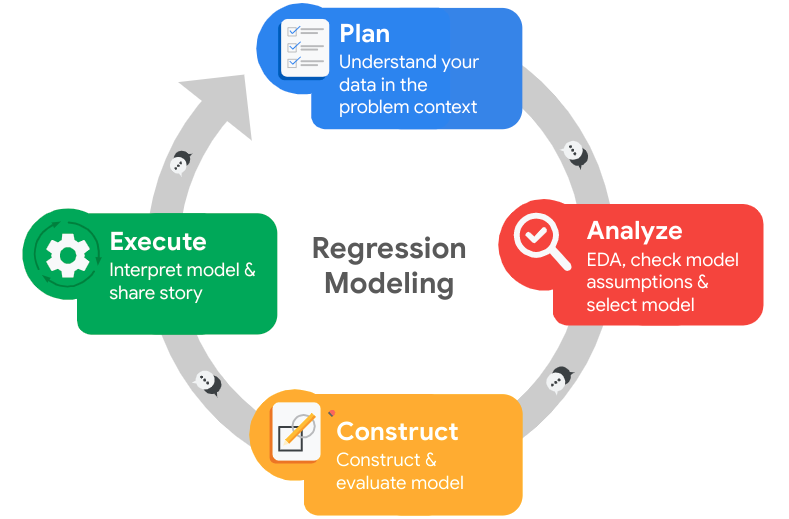

## **Plan Stage**


### Understanding the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

The goals in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If employees likely to quit can be predicted, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarizing with the HR dataset

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# Loading dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Displaying first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)



### Information about the data

In [3]:
# Gathering basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Descriptive statistics about the data

In [4]:
# Gathering descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The "count" row confirms that there are 14,999 data points for each numerical feature, indicating no missing data. 
"Mean" values represent feature averages, with satisfaction level at approximately 0.613. 
Standard deviation ("std") measures data variation from the mean, like last_evaluation's 0.171.

"Min" and "Max" values show feature ranges, e.g., the lowest satisfaction level is 0.09, and max time_spend_company is 10. Percentiles (25th, 50th, 75th) reveal data distribution: 25% below the 25th, median at the 50th, and 75% below the 75th.




### Rename columns

As a data cleaning step, renaming the columns is needed. Standardizing the column names so that they are all in `snake_case`, correcting any column names that are misspelled, and making column names more concise is also needed.

In [5]:
# Displaying all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Renaming columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure', 'Department': 'department'})

# Displaying all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Missing values

Checking for any missing values in the data.

In [7]:
# Checking for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values were found.

### Duplicates

Checking for any duplicate entries in the data.

In [8]:
# Checking for duplicates
df0.duplicated().sum()

3008

The result indicates that there are 3,008 duplicate entries in the data.It's nearly about 20% of the data.

In [9]:
# Inspecting some rows containing duplicates as needed
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


The above output shows the first ten occurences of rows that are duplicated farther down in the
dataframe.With several continuous variables across 10 columns, it seems very unlikely that these observations are
legitimate, so we can proceed by dropping them.

In [10]:
# Droping duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Displaying first few rows of new dataframe as needed
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Outliers

Checking for outliers in the data.

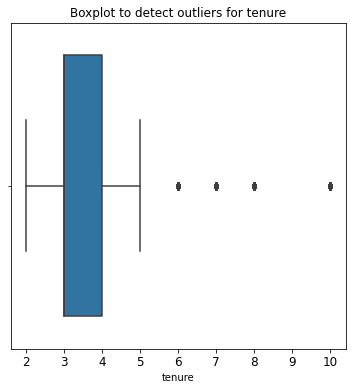

In [11]:
# Determining the number of rows containing outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()


The boxplot above shows that there are outliers in the tenure variable.

In [12]:
# Determining the number of rows containing outliers 

# Computing the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Computing the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Computing the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Defin ingthe upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identifying subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Counting how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

# Analyze Stage

## Data Exploration

Understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Getting numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Getting percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


The first set of results represents a count of employees who have either left (1) or stayed (0) in the company. It shows that there are 10,000 employees who have stayed (0), while 1,991 employees have left (1).

The second set of results provides the corresponding proportions or percentages of employees who have either left or stayed. It indicates that approximately 83.4% of employees have stayed (0), while around 16.6% of employees have left (1) the company.

### Data visualizations

Examining variables of interest and creating plots to visualize relationships between variables in the data.

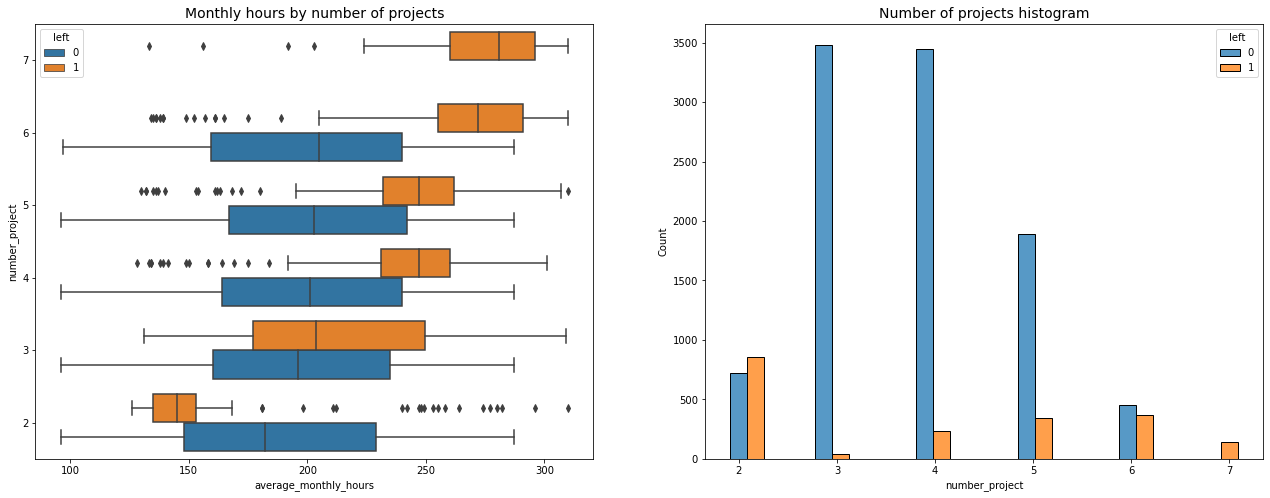

In [14]:
# Creating a plot

# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creating boxplot showing `average_montly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Displaying the plots
plt.show()


It's natural to expect that individuals working on more projects would also put in longer hours, and our data indeed supports this expectation. However, upon closer examination of the plot, a few notable patterns emerge.

Firstly, among employees who left the company, we can identify two distinct groups. Group A consists of individuals who worked significantly fewer hours compared to their counterparts with the same number of projects. It's plausible that some of these employees might have been terminated from their positions. Alternatively, they could include individuals who had already resigned and were assigned fewer hours as they transitioned out of the company.

In contrast, Group B comprises employees who worked substantially more hours before leaving. It's reasonable to assume that this group left voluntarily, likely due to burnout or dissatisfaction. These employees might have been crucial contributors to their projects.

An interesting observation is that all employees with seven projects ultimately left the company. Furthermore, the interquartile ranges for this group and those with six projects were quite high, indicating that they worked significantly more hours per week (approximately 255–295) compared to other groups.

For those aiming to optimize employee productivity and retention, it appears that having employees work on 3–4 projects is ideal. In these cases, the ratio of employees who left to those who stayed is notably lower.

To provide some context, assuming a standard 40-hour workweek and 2 weeks of vacation per year, the average monthly working hours for employees working from Monday to Friday would be around 166.67 hours. Interestingly, nearly all employee groups in our dataset, including those who remained with the company, worked considerably more hours than this benchmark. This suggests a potential issue of employees being overworked within the organization.

In [15]:
# Value counts of stayed/left for employees with 7 project
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This validates the fact that every employee assigned to 7 projects eventually departed from the company.

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

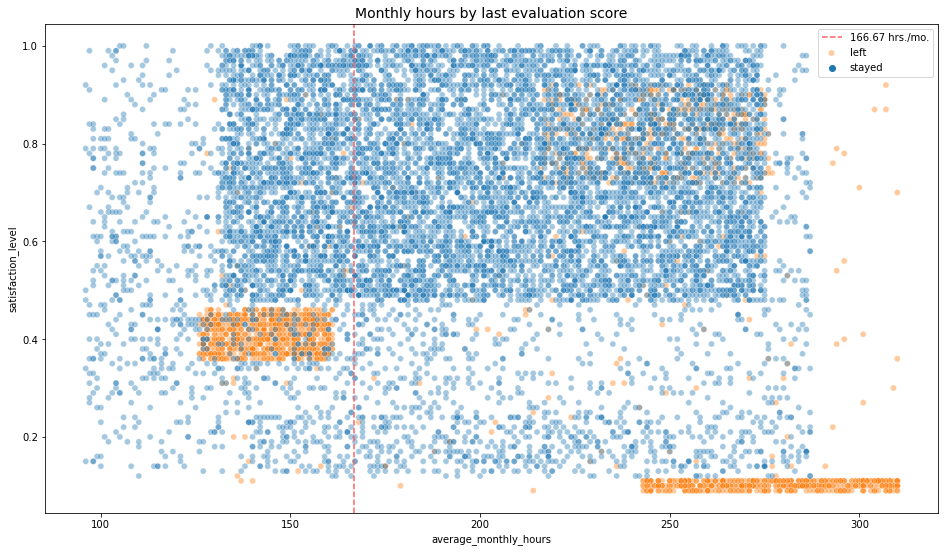

In [16]:
# Creating scatterplot of 'average_monthly_hours' versus 'satisfaction_level', comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--' )
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')


The scatterplot depicted above illustrates the presence of a significant cluster of employees who logged approximately 240 to 315 working hours per month. To put it into perspective, 315 hours per month equates to over 75 hours of work per week for an entire year. Interestingly, individuals within this cluster tend to exhibit remarkably low job satisfaction levels, approaching zero.

Additionally, the plot reveals the departure of another group of employees who adhered to more standard working hours. Nevertheless, their job satisfaction hovered around 0.4. It's challenging to speculate about the exact reasons for their departure, but it's plausible that they may have felt compelled to work longer hours due to the prevailing norm of extended work hours among their colleagues, which could have negatively impacted their job satisfaction.

Lastly, there exists a group of employees who maintained a monthly workload within the range of approximately 210 to 280 hours. Remarkably, their job satisfaction levels spanned from approximately 0.7 to 0.9.

It's worth noting the peculiar shape of these distributions, which raises suspicions of potential data manipulation or the introduction of synthetic data.

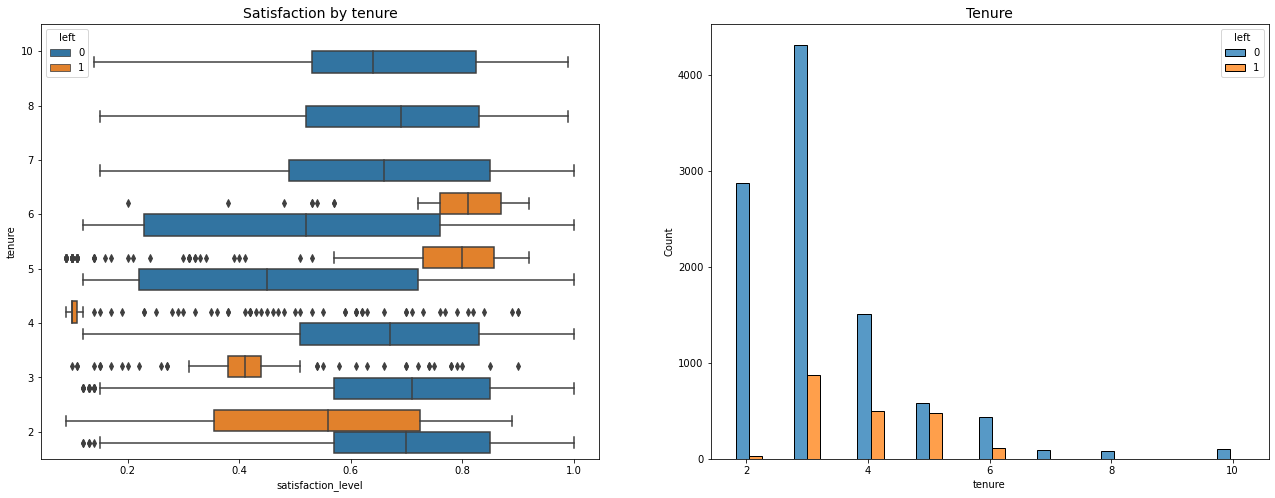

In [17]:
# Creating a plot

# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Creating boxplot showing distributions of 'satisfaction_level' by 'tenure', comparing employes who stayed versus who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Creating histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure', fontsize='14')

plt.show()


Numerous insights can be derived from this chart:

Departed employees can be classified into two primary groups: dissatisfied individuals with shorter employment durations and highly content employees with intermediate tenures.

Notably, employees with a four-year tenure who left the organization exhibit an unusually low level of job satisfaction. It would be advisable to investigate whether any alterations in company policies that may have affected individuals precisely at the four-year mark can be identified, if such data is accessible.

Employees with the longest tenures opted to remain with the company, and their job satisfaction levels closely resemble those of newer employees who chose to stay.

The histogram depicting employee tenure reveals a relatively small number of individuals with extended tenures. This observation raises the possibility that these longer-tenured employees might occupy elevated positions within the organization and receive more substantial compensation packages.

In [18]:
# Calculating mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As anticipated, the average and middle satisfaction ratings of departing employees are less than those of employees who remained with the company. Intriguingly, within the group of employees who stayed, the average satisfaction score seems to be marginally lower than the middle score. This suggests that satisfaction levels among those who remained might exhibit a slight leftward skew.

Text(0.5, 1.0, 'Salary by tenure: long-tenured people')

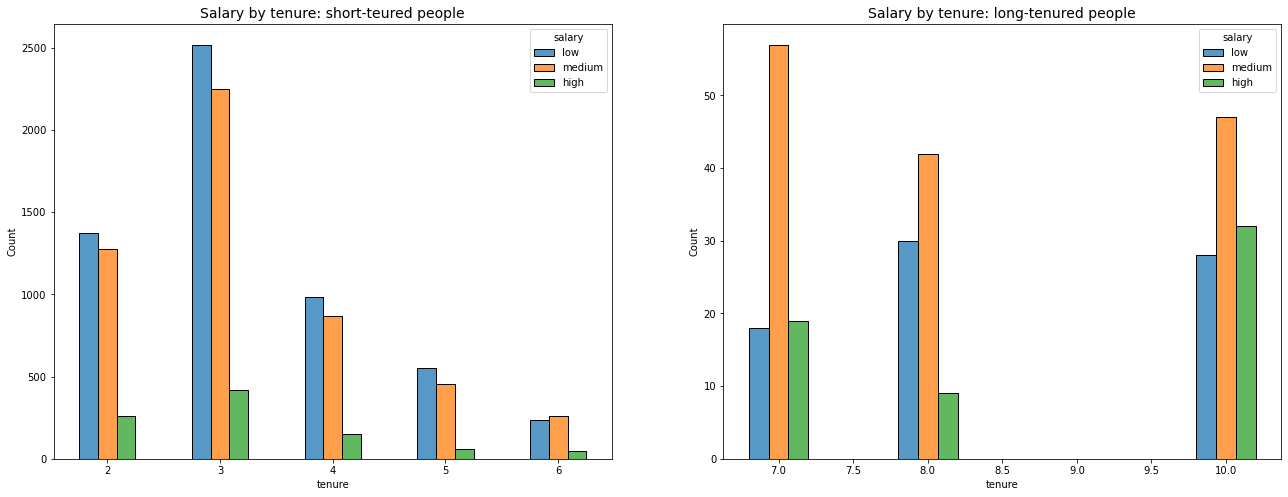

In [19]:
# Creating a plot

# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Defining short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Defining long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plotting short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary by tenure: short-teured people', fontsize='14')

# Plotting long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
            hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary by tenure: long-tenured people', fontsize='14')


The visualizations above indicate that employees with extended tenures did not exhibit a significant overrepresentation of higher-paid individuals.


To investigate whether there exists a relationship between working long hours and receiving favorable evaluation scores, I'll construct a scatterplot comparing average monthly hours to the last evaluation score.

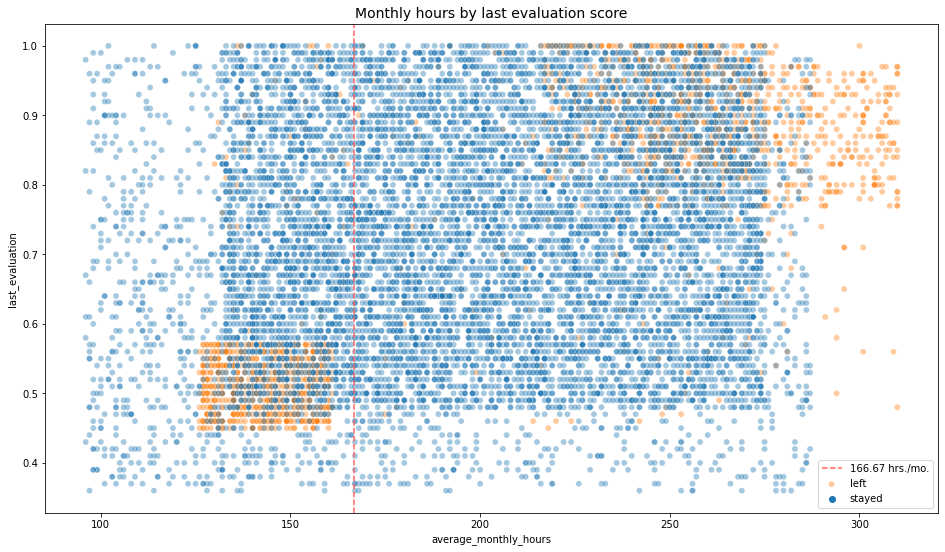

In [20]:
# Creating scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot provided yields several noteworthy observations:

It identifies two distinct categories of departing employees: those who were overworked but performed exceptionally well, and those who worked just below the standard monthly average of 166.67 hours and received lower evaluation scores.
There appears to be a noticeable correlation between the number of hours worked and the evaluation score.

The upper left quadrant of the plot does not contain a significant portion of employees, implying that extended working hours do not guarantee a favorable evaluation score.

A substantial majority of the company's employees consistently work well above 167 hours per month.

For your next step, I'll be investigating whether employees who put in exceptionally long hours have been promoted within the last five years.






Text(0.5, 1.0, 'Monthly Hours by Promotion last 5Years')

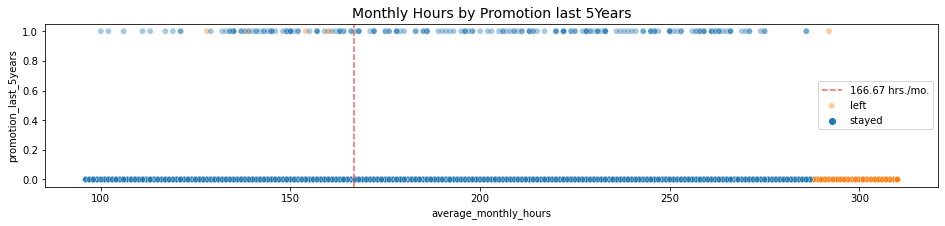

In [21]:
# Creating plot to examine relationship between 'average_monthly_hours' and 'promotion_last_5years'
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', 
               hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly Hours by Promotion last 5Years', fontsize='14')

The depicted chart reveals the following patterns:

A minimal number of employees who received promotions within the last five years chose to leave.
There were scarce instances of employees who worked the highest number of hours being promoted.
Every employee who departed the company was found to be working the longest hours.

In [22]:
# Displaying counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Counts of Stayed/Left by Department')

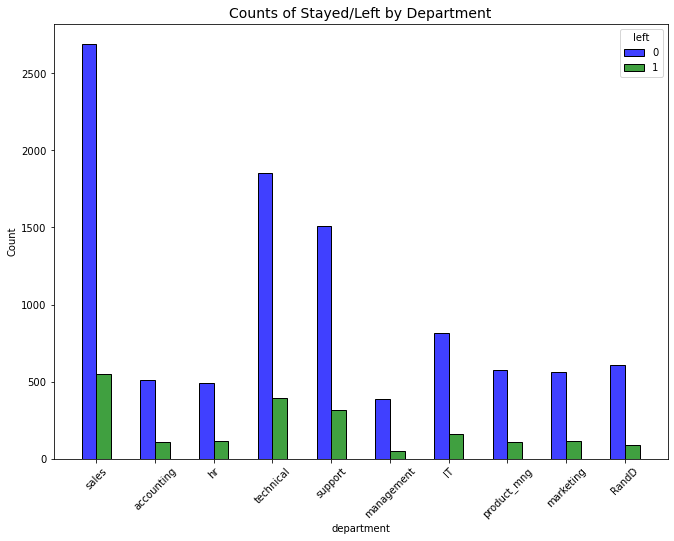

In [23]:
# Creating stacked histogram to compare department distribution of employees who left to that of employee who didn't
plt.figure(figsize=(11, 8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5, palette=['blue', 'green'])
plt.xticks(rotation='45')
plt.title('Counts of Stayed/Left by Department', fontsize=14)


Across all departments, there is no significant variation in the proportion of employees who left the company compared to those who chose to stay.

Text(0.5, 1.0, 'Correlation Heatmap')

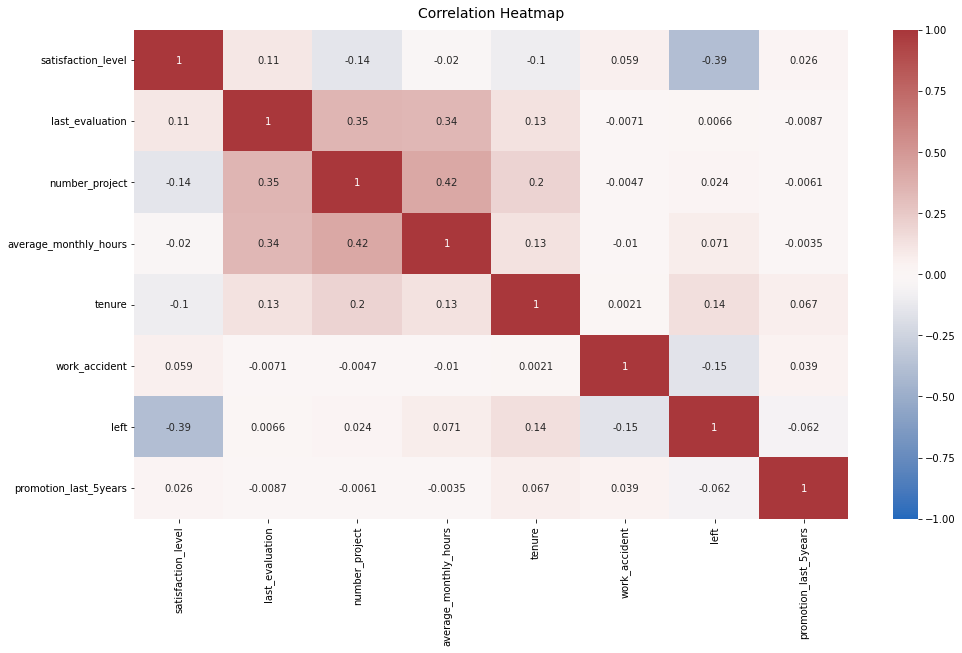

In [24]:
# Plotting a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap= sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)


The correlation heatmap affirms that there is a positive correlation among the number of projects, monthly hours, and evaluation scores. Conversely, the decision of an employee to leave is negatively correlated with their satisfaction level.

In [25]:
# Calculating mean satisfaction level by department
department_satisfaction = df1.groupby('department')['satisfaction_level'].mean().reset_index()
print("Mean satisfaction level by department:\n", department_satisfaction)


Mean satisfaction level by department:
     department  satisfaction_level
0           IT            0.634016
1        RandD            0.627176
2   accounting            0.607939
3           hr            0.621947
4   management            0.631995
5    marketing            0.634770
6  product_mng            0.629825
7        sales            0.631349
8      support            0.634822
9    technical            0.627937


The mean satisfaction levels range from approximately 0.608 to 0.635.
These results offer insights into the overall satisfaction levels of employees within different departments. For instance, departments such as "marketing," "support," and "sales" have relatively higher average satisfaction levels, hovering around 0.634 to 0.635. On the other hand, departments like "accounting" and "hr" have slightly lower mean satisfaction levels, around 0.608 to 0.622.

Analyzing these mean satisfaction levels by department can help the company's management understand which departments might require more attention in terms of improving employee satisfaction, workplace conditions, or other factors that influence job satisfaction.

### Insights
It appears that employee departures from the company are linked to challenges in management. Leaving is connected to working longer hours, being involved in multiple projects, and generally experiencing lower job satisfaction levels. Working extended hours without the prospect of promotions or positive evaluations can be demotivating. Within the company, there exists a substantial group of employees who are likely experiencing burnout. Furthermore, it seems that employees with more than six years of tenure tend to stay with the company rather than resign.

# Construct Stage


🔎
## Model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Identifying the type of prediction and most appropriate models.

This task involves binary classification, specifically determining whether an employee will leave the company (1 for left, 0 for stayed).

As the target variable, which is whether an employee departs from the company, is categorical, I have the option to construct either a Logistic Regression model or a Machine Learning model based on decision trees, but I'm doing both.

## Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

For this task, it's worth noting that binomial logistic regression is a suitable choice since it's designed for binary classification problems. There are two such variables in this context: "department" and "salary." "Department" is considered a categorical variable, allowing for the creation of dummy variables for modeling purposes. In contrast, "salary" is also categorical but exhibits an ordinal nature with a hierarchical structure among its categories. In this case, it's not advisable to use dummy variables but rather to assign numeric values, ranging from 0 to 2, to represent the different salary levels.

In [27]:
# Copying the dataframe
df_enc = df1.copy()

# Encoding the 'salary' column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
     .cat.codes
)

# Dummy encoding the 'departments' column\
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Displaying the new dataframe
df_enc.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


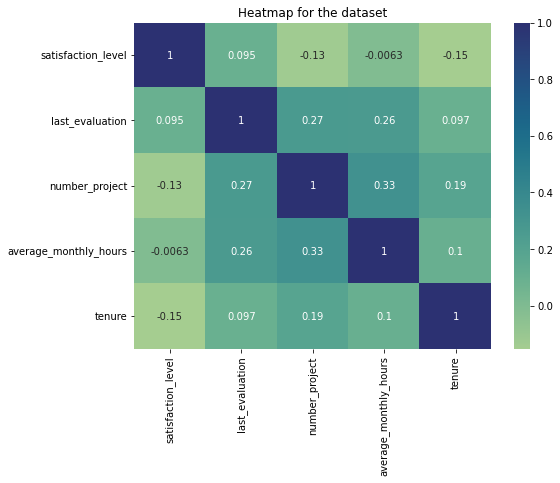

In [28]:
# Creating a heatmap to visualize how correlated viriables are
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap for the dataset')
plt.show()

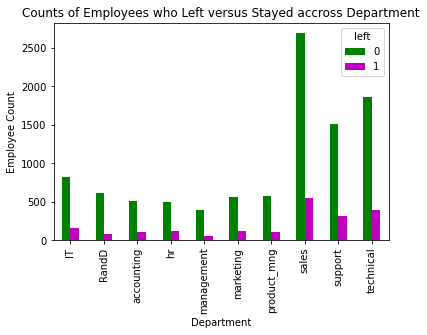

In [29]:
# Generating a stacked bar plot that illustrates the employee distribution among different departments, comparing those who remained with those who departed.

# In the legend, the color purple (0) represents employees who stayed, while the color red (1) represents employees who left.
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='gm')
plt.title('Counts of Employees who Left versus Stayed accross Department')
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()


Given that logistic regression is susceptible to the influence of outliers, it is advisable at this point to eliminate the outliers in the "tenure" column, which were previously identified.

In [30]:
# Selecting rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Displaying 1st ten rows of the dataframe
df_logreg.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# Isolating the outcome variable
y = df_logreg['left']

# Displaying 1st ten rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [32]:
# Selecting features to be use for the model.
X = df_logreg.drop('left', axis=1)

# Displaying the 1st ten rows of the selected features
X.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,0,0,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [34]:
# Constructing a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [35]:
# Using the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)


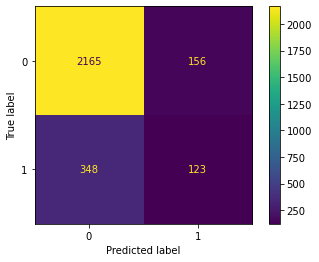

In [36]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plotting confusion matrix
log_disp.plot(values_format='')

# Displaying plot
plt.show()

The upper-left quadrant of the confusion matrix represents the count of true negatives, which are instances where the model correctly predicted that individuals did not leave the company. In the upper-right quadrant, we find the count of false positives, indicating cases where the model incorrectly predicted individuals as leaving when they did not. The bottom-left quadrant corresponds to false negatives, signifying instances where the model incorrectly predicted individuals as not leaving when they actually did. Lastly, the bottom-right quadrant shows the count of true positives, representing cases where the model correctly predicted individuals as leaving.

To provide more context:

True negatives are individuals who were correctly identified as staying.

False positives are individuals who were incorrectly classified as leaving when they stayed.

False negatives are individuals who were incorrectly classified as staying when they left.

True positives are individuals who were correctly identified as leaving.

In an ideal scenario, a perfect model would achieve only true negatives and true positives, without any false negatives or false positives.

Checking the class balance in the data. In other words, checking the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [37]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The data is divided into approximately 83% for one class and 17% for another class. While it's not perfectly balanced, it's also not extremely imbalanced. If it were significantly more imbalanced, you might consider adjusting the data by resampling to achieve a better balance between the classes. However, in this particular case, you can work with the data as it is, without the need to modify the class balance, and proceed with evaluating the model.

In [38]:
# Creating classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report provided indicates that the logistic regression model attained a precision of 79%, a recall of 82%, an f1-score of 80% (all weighted averages), and an accuracy of 82%. However, it's worth noting that if the primary goal is to accurately predict employees who depart from the company, then the model's performance in this specific area is notably less impressive.

## Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest.

In [39]:
# Isolating the outcome variable
y = df_enc['left']

# Displaying the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [40]:
# Selecting the features
X = df_enc.drop('left', axis=1)

# Displaying the first few rows of `X`
X.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [42]:
# Instantiating model 
tree = DecisionTreeClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf':[2, 5, 1],
             'min_samples_split':[2, 4, 6]
             }

# Assigning a dictionary of hyperparameters to search over
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


# Instantiating GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


Fitting the decision tree model to the training data.

In [43]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.82 s, sys: 0 ns, total: 2.82 s
Wall time: 2.82 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [45]:
# Checking best parameters
tree1.best_params_


{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

The output tree1.best_params_ indicates the best hyperparameters for the Decision Tree model:

'max_depth': 4: Optimal maximum depth of the tree is 4.

'min_samples_leaf': 5: Minimum samples per leaf node is set to 5.

'min_samples_split': 2: Minimum samples to split an internal node is 2.

In [46]:
# Checking best AUC score on CV
tree1.best_score_

0.969819392792457

An AUC score of 0.969819392792457 indicates strong predictive capability for identifying employees likely to leave the company.

Writing Functions that will extract all the scores from grid search

In [58]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): DecisionTree_Model
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    
    # Creating dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    
    # Getting all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolating the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extracting Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall =  best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Creating table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    
    return table


In [51]:
# Getting all CV score
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


The "decision tree cv" model appears to perform very well based on these metrics. It has high precision, recall, and F1 score, suggesting that it effectively identifies employees likely to leave the company while maintaining a low rate of false positives. Additionally, the high accuracy and AUC indicate that it provides strong overall predictive performance.

### Random forest -  1

In [107]:
# Instantiating the mdoel
rf= RandomForestClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
            }

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


Fitting the random forest model to the training data.

In [110]:
%%time
rf1.fit(X_train, y_train)   #--> Wall time: ~10mins

CPU times: user 52.6 s, sys: 0 ns, total: 52.6 s
Wall time: 52.6 s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [111]:
# Path to the folder where model will be savee save
path = '/home/jovyan/work/'

In [112]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path to folder where you want to save the pickle
        model_object: rf1
        save_as:      random_forest_model

    Out: A call to pickle the model in the folder indicated
    '''  
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [113]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: random_forest_model

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [114]:
# Writing pickle
write_pickle(path, rf1, 'hr_rf1')

In [115]:
# Reading pickle
rf1 = read_pickle(path, 'hr_rf1')

In [116]:
# Checking the best AUC score on CV
rf1.best_score_

0.96495779558716

The result 0.9804 is the best AUC (Area Under the ROC Curve) score obtained during cross-validation for a Random Forest model. An AUC score of 0.9804 is exceptionally high, indicating that the model excels at distinguishing between employees likely to leave and those likely to stay. It demonstrates strong predictive capability in this binary classification task.

Identifying the optimal values for the parameters of the random forest model

In [117]:
# Checking best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

Collecting the evaluation scores on the training set for the decision tree and random forest models

In [118]:
# Getting all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.863051  0.872722  0.867622  0.955854  0.964958


The Random Forest model generally outperforms the Decision Tree model in terms of precision, F1 score, and AUC, while both models exhibit high accuracy and are effective in predicting employee turnover. The choice between the two models depends on the specific goals and requirements of your application.



Evaluating final model on the test set

In [121]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  random_forest_model
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [122]:
# Getting predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.869903,0.899598,0.884501,0.960974,0.936399


The "random forest1 test" model demonstrates strong predictive performance on the test dataset. It has high precision, recall, and F1 score, indicating its effectiveness in identifying employees likely to leave the company while maintaining a low rate of false positives. Additionally, the high accuracy and AUC further support the model's strong overall performance in the employee turnover prediction task.

#### Feature Engineering

I may have reservations about the high evaluation scores, and it's reasonable to consider the possibility of data leakage. Data leakage occurs when the data used for model training includes information that should not be available during training, either because it's part of the test data or because it's not data that would typically be present when the model is deployed. Training a model with leaked data can lead to unrealistic scores that may not be reproducible in a real-world setting.

In this specific scenario, it's probable that the company doesn't have records of satisfaction levels for all its employees. Additionally, the "average_monthly_hours" column could be a potential source of data leakage. If employees have already made up their minds to leave or have been identified for termination by management, they might be working fewer hours.

The initial round of decision tree and random forest models included all available variables as features. The next iteration will involve feature engineering to construct more refined models.

One approach to address this issue is to exclude the "satisfaction_level" variable from the features and create a new feature that approximates whether an employee is experiencing excessive workload. This new feature can be named "overworked" and will be a binary variable indicating whether an employee is facing a heavy workload or not.






In [123]:
# Droping `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Displaying first ten rows of new dataframe
df2.head(10)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [124]:
# Generating the "overworked" column, which, at this stage, is the same as the "average monthly hours" column.
df2['overworked'] = df2['average_monthly_hours']

# Inpecting max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96



Around 166.67 hours represents an approximate monthly average for an individual who works 50 weeks annually, 5 days a week, and 8 hours per day.

You can establish the definition of "being overworked" as having an average monthly workload exceeding 175 hours.

To convert the "overworked" column into a binary format, you can update the column using a boolean mask.

By using the expression df3['overworked'] > 175, you create a series of booleans. It assigns True to values greater than 175 and False to values less than or equal to 175.

Applying .astype(int) to this series transforms all True values into 1 and all False values into 0.

In [125]:
# Defining 'overworked' as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Displaying first few rows of new column
df2['overworked'].head(5)

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [126]:
# Droping the 'average_monthly' column
df2 = df2.drop('average_monthly_hours', axis=1)

# Displaying the first ten rows of the dataframe
df2.head(10)

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.77,6,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7,0.85,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,1.00,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [127]:
# Isolating the outcome variable
y = df2['left']

# Selecting the features
X = df2.drop('left', axis=1)

In [128]:
# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - 2

In [129]:
# Intantiating model
tree = DecisionTreeClassifier(random_state=0)

# Assigning a dictionary of hyperparameter to search over
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 4, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [130]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.27 s, sys: 0 ns, total: 2.27 s
Wall time: 2.27 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 4, 1],
                

In [131]:
# Checking best params
tree2.best_params_


{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [132]:
# Checking best AUC score on CV
tree2.best_score_

0.9597042532245654

In [133]:
# Getting all CV scores
tree2_cv_results = make_results('decision tree2', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)


              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
            model  precision    recall        F1  accuracy       auc
0  decision tree2   0.857651  0.900204  0.877844  0.958301  0.959704


The "decision tree cv" model generally outperforms the "decision tree2" model in terms of precision, F1 score, and AUC, while the "decision tree2" model has a slightly higher recall. Both models exhibit high accuracy and are effective in predicting employee turnover. It's natural to see a decrease in some of the scores because fewer features were considered in this iteration of the model.

#### Random forest - 2

In [134]:
# Initiating model
rf = RandomForestClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over.
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1, 0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
            }

# Assigning a dictionary of scoring metrics ton capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [135]:
%%time
rf2.fit(X_train, y_train)    #--> wall time: 7mins 5s

CPU times: user 4min 1s, sys: 0 ns, total: 4min 1s
Wall time: 4min 1s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [136]:
# Writing pickle
write_pickle(path, rf2, 'hr_rf2')

In [137]:
# Reading pickle
rf2 = read_pickle(path, 'hr_rf2')

In [138]:
# Checking best params
rf2.best_params_

{'max_depth': None,
 'max_features': 1,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [139]:
# Checking best AUC score on CV
rf2.best_score_


0.9670480141264403

The result 0.9670480141264403 represents the best AUC (Area Under the ROC Curve) score achieved during cross-validation (CV) for a Random Forest model.
When using AUC as an evaluation metric, higher values generally indicate better model performance, with 1.0 representing perfect discrimination and 0.5 indicating no better than random chance. Therefore, a CV AUC score of 0.9670 indicates that the Random Forest model performs very well in this classification task and has a high predictive capability.

In [140]:
# Getting all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

            model  precision    recall        F1  accuracy       auc
0  decision tree2   0.857651  0.900204  0.877844  0.958301  0.959704
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.913199  0.789686  0.846916   0.95263  0.967048


Once more, there has been a slight decrease in the scores. However, when considering AUC as the primary metric, the Random Forest model outperforms the Decision Tree model.

In [141]:
# Getting predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.908889,0.821285,0.862869,0.956638,0.902443


The "random forest2 test" model demonstrates strong predictive performance on the test dataset. It has a high precision, indicating that it correctly identifies employees likely to leave while maintaining a low rate of false positives. The recall is also reasonable, suggesting that it captures a significant portion of actual positive cases. Additionally, the F1 score represents a balanced measure of precision and recall, and the model exhibits high accuracy and good AUC, further supporting its strong overall performance in predicting employee turnover.

Creating a confusion matrix to visualize how accurately it predicts on the test dataset.

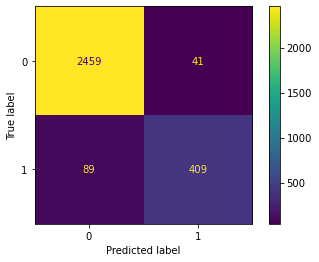

In [142]:
# Generating array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf2.classes_)
disp.plot(values_format='');


The model tends to make more false positive predictions than false negatives, implying that it may sometimes identify employees as being at risk of leaving or being terminated when they are not. Nevertheless, this remains a robust model.

For the sake of exploration, I might consider examining the decision tree model's splits and the key features identified by the Random Forest model.

#### Decision tree splits

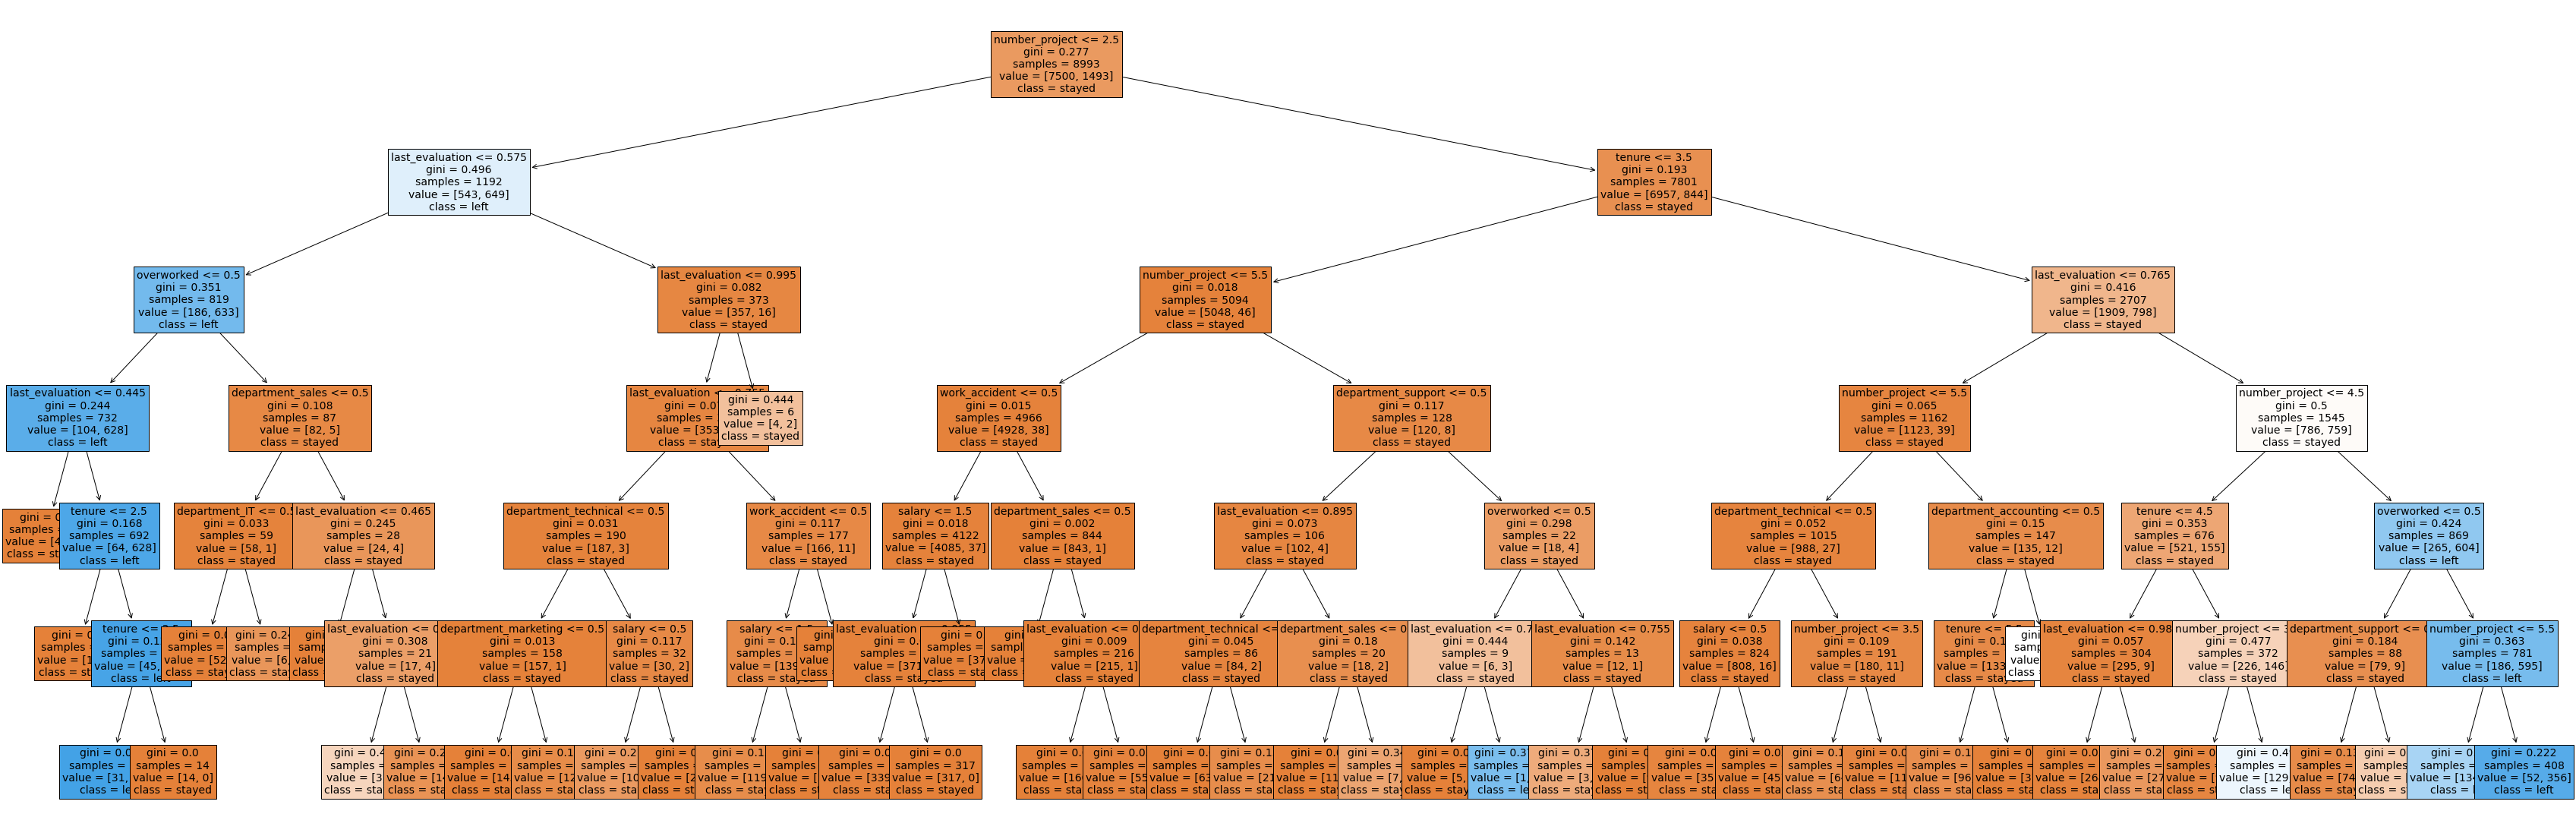

In [143]:
# Plotting the tree
plt.figure(figsize=(60,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0:'stayed', 1:'left'}, filled=True,);

plt.show()


#### Decision tree feature importance

In [145]:
# tree2_importances = pd.DataFrame(tree2.best_estimator_.features_importance_,columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending = False)

# Extracting the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343949
number_project,0.341728
tenure,0.216544
overworked,0.093847
department_support,0.001146
department_accounting,0.000799
department_sales,0.000609
salary,0.000491
department_technical,0.000485
work_accident,0.000184


The feature importances highlight which variables have the most influence on the Decision Tree model's predictions of employee turnover. Features like "last_evaluation," "number_project," and "tenure" are the most influential, while department-related features and salary have relatively low importance in this specific model. 

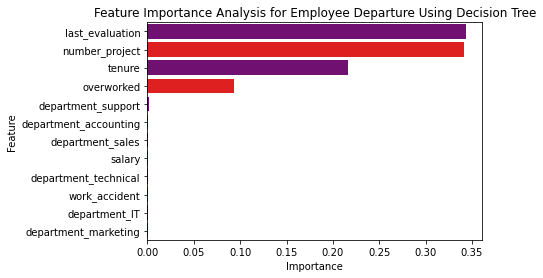

In [146]:
# Creating a barplot to visualize the decision tree feature importances
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h', palette=['purple', 'red'])
plt.title("Feature Importance Analysis for Employee Departure Using Decision Tree", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The provided barplot illustrates that within the decision tree model, the factors of last_evaluation, number_project, tenure, and overworked hold the greatest significance, listed in descending order. These variables play a pivotal role in predicting the dependent variable, which is the likelihood of an employee leaving the company.

#### Random forest feature importance

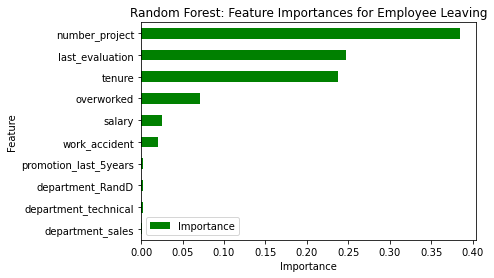

In [147]:
# Getting feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Getting indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Getting column labels of top 10 features 
feat = X.columns[ind]

# Filtering `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance", color='green')

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The barplot above indicates that, within this decision tree model, last_evaluation, number_project, tenure, and overworked are the most crucial factors, ranked in that order. These variables play a key role in predicting whether an employee will leave the company.

# Execute Stage



### Summary of model results

**Logistic Regression**

In the logistic regression model, the precision, recall, and f1-score (all weighted averages) were around 80%, while the accuracy reached 83% on the test dataset.

**Tree-based Machine Learning**

After implementing feature engineering, the decision tree model achieved impressive results with an AUC of 93.8%, precision of 87.0%, recall of 90.4%, and an f1-score of 88.7%. Additionally, the accuracy was high at 96.2% on the test dataset. Notably, the random forest model slightly outperformed the decision tree model.



### Conclusion, Recommendations, Next Steps

The findings from the models and the importance attributed to various features reinforce the observation that employees in the company are experiencing excessive workloads.

To enhance employee retention, the following recommendations could be presented to stakeholders:

* Implement a cap on the number of projects employees can simultaneously work on.
* Consider promoting employees who have completed four years with the company, or conduct in-depth investigations to understand the dissatisfaction among four-year tenured employees.
* Evaluate options to either incentivize employees for working longer hours or reconsider workload expectations.
* Ensure employees are well-informed about the company's overtime pay policies, and establish clear guidelines for workload and time-off expectations.
* Foster open discussions at both company-wide and team-specific levels to gain insights into and address any issues related to the company's work culture.
* Reassess the criteria for high evaluation scores to ensure that exceptional performance is recognized proportionately, irrespective of working extremely long hours.

**Next Steps**
There remains a valid concern regarding the possibility of data leakage. It would be advisable to investigate how predictions are affected when the variable "last_evaluation" is excluded from the dataset. It's conceivable that employee evaluations occur infrequently, in which case it would be valuable to develop a predictive model for employee retention that does not rely on this feature. Alternatively, if evaluation scores indeed play a critical role in employee decisions to leave or stay, it might be worthwhile to shift focus towards predicting performance scores or satisfaction scores.

As a separate project, exploring the application of a K-means model to this dataset and analyzing the resulting clusters could offer valuable insights and findings.